In [13]:
#helps import a library for handling numbers or data
import numpy as np

#performs tabular analysis on those numbers
import pandas as pd

#perform statistical analysiss
import scipy.stats as stats

#for visualization
import matplotlib.pyplot as plt
import seaborn as sb

#for statistical analysis
import statsmodels.api as sm

In [14]:
import pandas as pd
import numpy as np

#list for data
data = [10, 15, 14, 18, 20, 24, 22, 25, 30]

print("Mean:",np.mean(data))
print("Standard Deviation:",np.std(data))
print("Median:",np.median(data))

Mean: 19.77777777777778
Standard Deviation: 5.864730320176288
Median: 20.0


In [15]:
#Using a dictionary -- dictionary consists of a key and a value
# Key:Value -- Key can be one - Value can be multiple

data2 = {
    "Employee": ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"],
    "Salary": [50000, 55000, 52000, 61000, 58000, 60000, 57000, 54000, 63000, 59000]
}
#since we have multiple data items, we use pandas library
df = pd.DataFrame(data2)
print(df)


  Employee  Salary
0        A   50000
1        B   55000
2        C   52000
3        D   61000
4        E   58000
5        F   60000
6        G   57000
7        H   54000
8        I   63000
9        J   59000


In [16]:
#you only pass data for a particular parameter - Example: Salary
#mode is present in the pandas library
#Measures of Dispresion
#Includes range, stdeve and variance
meanvalue = df["Salary"].mean()
medianvalue = df["Salary"].median()
modevalue = df["Salary"].mode()[0]
stdvalue = df["Salary"].std()
varvalue = df["Salary"].var()
rangevalue = df["Salary"].max() - df["Salary"].min()
print("Mean: ",meanvalue)
print("Median: ",medianvalue)
print("Mode: ",modevalue)
print("Std: ",stdvalue)
print("Var:",varvalue)
print("Range:",rangevalue)

Mean:  56900.0
Median:  57500.0
Mode:  50000
Std:  4121.757985239901
Var: 16988888.888888888
Range: 13000


Handson: Use numpy to extract measures of central tendency and measures of dispersion - Already done
## Data Distribution (Visualization)

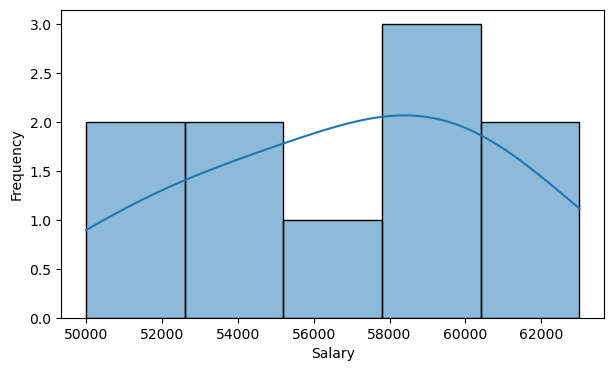

In [17]:
#creates a figure
plt.figure(figsize=(7,4))
#prepares a histogram
#KDE - KERNEL DISTRIBUTION ESTIMATE - GIVES THE SMOOTHENED DISTRIBUTION OF DATA
sb.histplot(df["Salary"],kde=True,bins=5)
#gives the x and ylabels
plt.xlabel("Salary")
plt.ylabel("Frequency")
#shows only the graph
plt.show()

## 3. Probability Distributions
Normal Distribution - Gives a continuous distribution of data like a bell curve. It is a mirror image on the left and right side. We measure mean and standard deviation with normal distribution. Here, we have created a random normal distribution with a mean of 50000. There is a range in which a normal distribution falls into.

Binomial Distribution - The bins are discreet in a binomial distribution. Use when you need to understand successes vs failure etc. When you increase the bins, the distribution approaches normal distribution (>30)

Poisson Distribution - Used to measure average rate in a fixed distribution

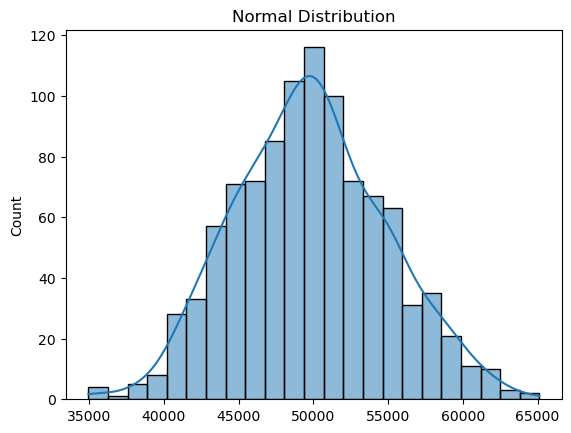

In [18]:
normal_data = np.random.normal(loc = 50000,scale=5000,size=1000)
sb.histplot(normal_data,kde=True)
plt.title("Normal Distribution")
plt.show()

## Binomial Distribution

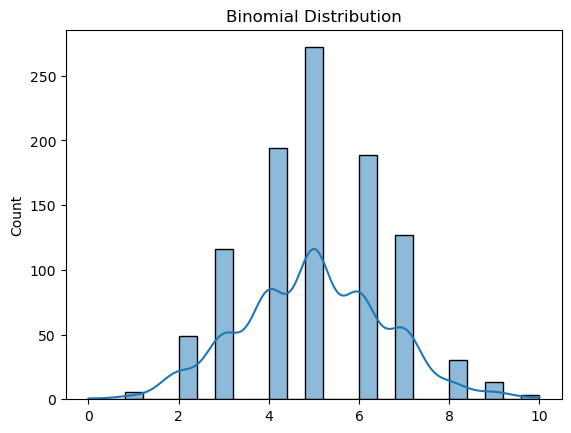

In [19]:
binomial_data = np.random.binomial(n=10,p=0.5,size=1000)
sb.histplot(binomial_data,kde=True)
plt.title("Binomial Distribution")
plt.show()

## Poisson Distribution

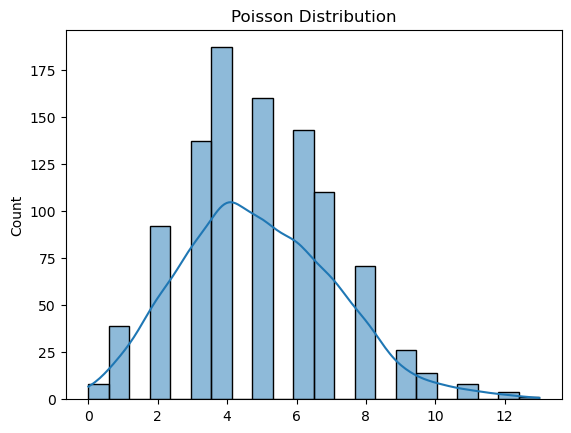

In [20]:
poisson_data = np.random.poisson(lam=5, size=1000)
sb.histplot(poisson_data,kde=True)
plt.title("Poisson Distribution")
plt.show()

## 2. Inferential Statistics
Inferential statistics help draw conclusions about a population based on a sample.

Hypothesis Testing: t-test, chi-square test

Confidence Intervals

ANOVA (Analysis of Variance)

In [21]:
from scipy import stats

sample1 = [10, 20, 30, 40, 50]
sample2 = [15, 25, 35, 45, 55]

In [22]:
t_stat,p_value = t_stat, p_value = stats.ttest_ind(sample1, sample2)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -0.5
P-Value: 0.6305360755569764


## 3. Inferential Statistics & Hypothesis Testing
#### Dataset: Comparing Two Teams’ Salaries

In [43]:
#build a dictionary of two teams
# T test is used to identify if two groups are significantly different from each other
#T statistic tells how big is the difference between the data
#P value tells if the two values are significantly different or not
team_A = [51000, 52000, 53000, 55000, 56000, 57000, 59000, 60000, 62000, 63000]
team_B = [48000, 49000, 50000, 51000, 52000, 53000, 55000, 56000, 58000, 59000]
df = pd.DataFrame({"Team A": team_A, "Team B": team_B})
print(df)

   Team A  Team B
0   51000   48000
1   52000   49000
2   53000   50000
3   55000   51000
4   56000   52000
5   57000   53000
6   59000   55000
7   60000   56000
8   62000   58000
9   63000   59000


In [44]:
t_stat,p_value = t_stat, p_value = stats.ttest_ind(df["Team A"], df["Team B"])
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 2.081046782697362
P-Value: 0.05198196596287718


##### 📌 Interpretation: If p < 0.05, salaries between Team A and Team B are significantly different.

## ANOVA (Comparing Three Groups)

In [45]:
team_C = [52000, 53000, 54000, 56000, 57000, 59000, 61000, 62000, 64000, 65000]

In [46]:
#anova helps us compare more than two (3 or more groups) in case all are statistically different
# One way anova - you have one independent variables
# if there are multiple IVs, you build groups and the groups are used later
f_stat, p_value = stats.f_oneway(df["Team A"], df["Team B"], team_C)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 4.058120016785564, P-Value: 0.028777475672818274


##### 📌 Interpretation: If p < 0.05, at least one group’s salary is significantly different. Thus, all three groups are highly signifcant

In [53]:
# Hanson on T Test and Anova Test
# If votes from two different samples are similar or not
s1 = [1,2,1,3,4,1,2,3]
s2 = [1,4,3,1,4,2,1,3]
#Add another group for anova
s3 = [4,4,4,4,4,4,4,4]
#T Test
t_stat,p_value = t_stat, p_value = stats.ttest_ind(s1, s2)
print("T Test")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)
print("Conclusion: Difference is insignificant")
print("ANOVA")
f_stat, p_value = stats.f_oneway(s1, s2, s3)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")
print("Conclusion: Difference is significant")

T Test
T-Statistic: -0.41070025419420025
P-Value: 0.6875091671704372
Conclusion: Difference is insignificant
ANOVA
F-Statistic: 8.391566265060241, P-Value: 0.0020973649088746452
Conclusion: Difference is significant


# 4. Correlation and Regression Analysis

In [59]:
#relationship between salary and experience - salary is dependent, experience is independent 
#correlation: if two fetures are related to each other or not and what kind of relationship they have
data = {
    "Experience (Years)": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Salary": [40000, 45000, 48000, 52000, 55000, 60000, 62000, 65000, 68000, 72000]
}
df = pd.DataFrame(data)
print(df)


   Experience (Years)  Salary
0                   1   40000
1                   2   45000
2                   3   48000
3                   4   52000
4                   5   55000
5                   6   60000
6                   7   62000
7                   8   65000
8                   9   68000
9                  10   72000


#### Correlation Coefficient
This is between -1 to 1 -- highly correlated data will be close to 1, no correlation - close to 0, negative correlation - -1

In [60]:
correlation = df.corr()
print(correlation)

                    Experience (Years)    Salary
Experience (Years)            1.000000  0.997458
Salary                        0.997458  1.000000


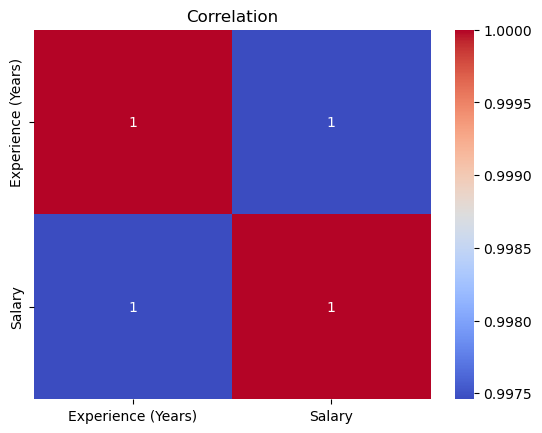

In [61]:
#build a heatmap for the same
sb.heatmap(correlation,annot=True, cmap="coolwarm")
plt.title("Correlation")
plt.show()

### Regression

In [64]:
#Ordinary Least squares - squares of errors are kept at minimum

X = df["Experience (Years)"]
y = df["Salary"]

X = sm.add_constant(X)  # Adding intercept
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1568.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.82e-10
Time:                        16:30:19   Log-Likelihood:                -79.807
No. Observations:                  10   AIC:                             163.6
Df Residuals:                       8   BIC:                             164.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.773e+04    540

C:\Users\sajag177350\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


## 5. Confidence Intervals

In [65]:
mean_salary = np.mean(df["Salary"])
std_error = stats.sem(df["Salary"])
confidence_interval = stats.t.interval(0.95, len(df["Salary"])-1, loc=mean_salary, scale=std_error)

print(f"95% Confidence Interval for Salary: {confidence_interval}")


95% Confidence Interval for Salary: (49212.06615462604, 64187.93384537396)


### Real world Example

In [71]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df = df[["rm", "medv"]]  # Selecting relevant columns
df.columns = ["Rooms", "House Price"]
print(df.head())
print(df.tail())

   Rooms  House Price
0  6.575         24.0
1  6.421         21.6
2  7.185         34.7
3  6.998         33.4
4  7.147         36.2
     Rooms  House Price
501  6.593         22.4
502  6.120         20.6
503  6.976         23.9
504  6.794         22.0
505  6.030         11.9


### Build a scatterplot

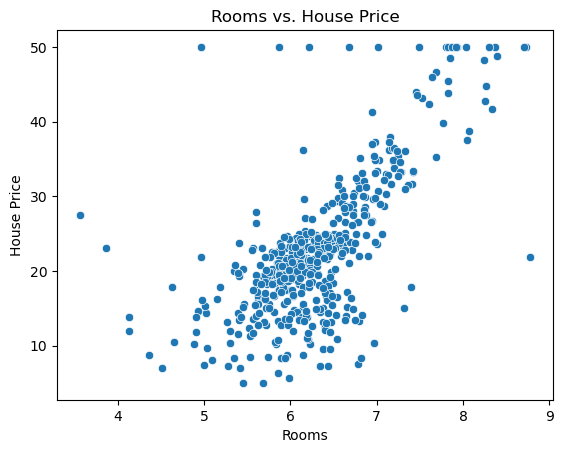

In [68]:
sb.scatterplot(x=df["Rooms"], y=df["House Price"])
plt.title("Rooms vs. House Price")
plt.show()

                            OLS Regression Results                            
Dep. Variable:            House Price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           2.49e-74
Time:                        16:40:18   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

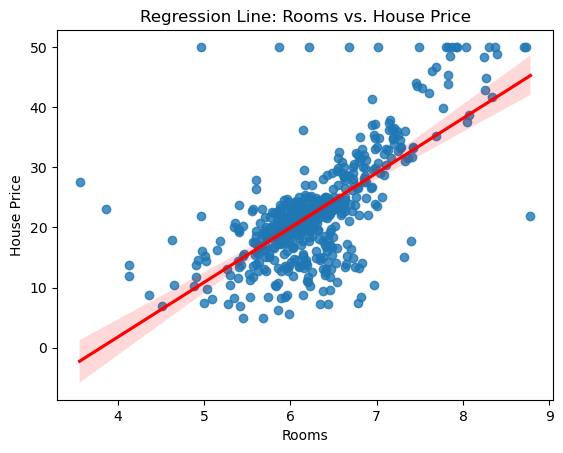

In [70]:
X = df["Rooms"]
y = df["House Price"]

X = sm.add_constant(X)  # Adding intercept
model = sm.OLS(y, X).fit()
print(model.summary())

sb.regplot(x=df["Rooms"], y=df["House Price"], line_kws={"color": "red"})
plt.title("Regression Line: Rooms vs. House Price")
plt.show()
